In [1]:
# The code was removed by DSX for sharing.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import scikitplot as skplt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

from keras import optimizers
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import regularizers
from keras.callbacks import EarlyStopping

In [4]:
X_raw = data.iloc[:, 0:-1]
y_raw = data.iloc[:, -1]

X_train_raw, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.3, random_state=0)

# over sampling
sm = SMOTE(random_state=0)
X_train, y_train = sm.fit_sample(X_train_raw, y_train)

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.fit_transform(X_test)

In [ ]:
#-------------------Build the Neural Network model-------------------
print('Building Neural Network model...')
adam = optimizers.adam(lr = 0.1, decay = 0.00001)

model = Sequential()

model.add(Dense(64, input_dim=X_train_normalized.shape[1],
                kernel_initializer='normal',
                #kernel_regularizer=regularizers.l2(10),
                activation="relu"))
model.add(Dropout(0.1))

model.add(Dense(32,
                kernel_initializer='normal',
                #kernel_regularizer=regularizers.l2(10),
                activation="relu"))
model.add(Dropout(0.1))

model.add(Dense(16,
                kernel_initializer='normal',
                #kernel_regularizer=regularizers.l2(10),
                activation="relu"))
model.add(Dropout(0.1))

model.add(Dense(4,
                kernel_initializer='normal',
                #kernel_regularizer=regularizers.l2(10),
                activation="relu"))
model.add(Dropout(0.1))

model.add(Dense(1))
model.add(Activation("sigmoid"))
model.compile(loss="binary_crossentropy", optimizer='adam')
callbacks = [EarlyStopping(monitor='val_loss', min_delta=0, patience=50)]

history = model.fit(X_train_normalized, y_train, validation_split=0.20, epochs=200, batch_size=1024, callbacks=callbacks)

Building Neural Network model...
Train on 318430 samples, validate on 79608 samples
Epoch 1/200
318430/318430 [==============================] - 7s 23us/step - loss: 0.3130 - val_loss: 0.1683
Epoch 2/200
304128/318430 [===========================>..] - ETA: 0s - loss: 0.0951

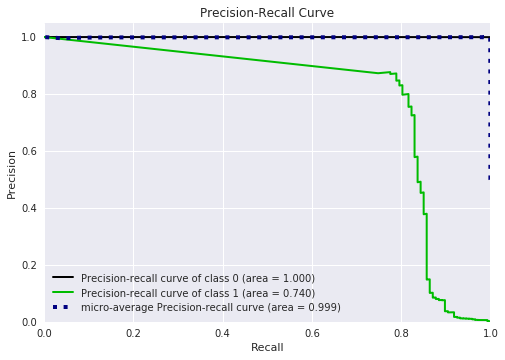

In [20]:
y_hat = model.predict_proba(X_test_normalized)

skplt.metrics.plot_precision_recall_curve(y_test, np.concatenate([1-y_hat, y_hat], axis = 1))
plt.show()

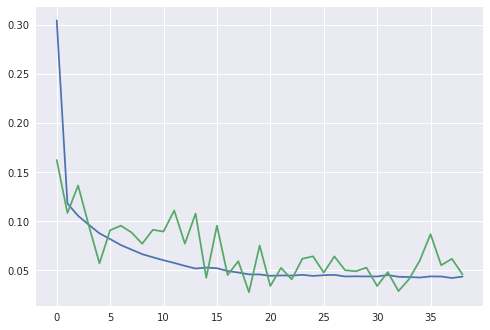

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])